In [19]:
import sys
sys.path.append('../config')
import pandas as pd
import numpy as np
import fredapi as fa
from fredconfig import settings
import matplotlib.pyplot as plt

import seaborn as sns
dark2 = sns.color_palette('Dark2')

plt.style.use("dark_background")
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

In [2]:
fred = fa.Fred(settings['api_key'])

In [3]:
hpi_nation = fred.get_series('USSTHPI')
hpi_nation.index.name = 'Date'
hpi_nation.name = 'HPI'
normed_hpi_nation = hpi_nation / hpi_nation.iloc[0]
n_period = 4
roc = normed_hpi_nation / normed_hpi_nation.shift(n_period) - 1

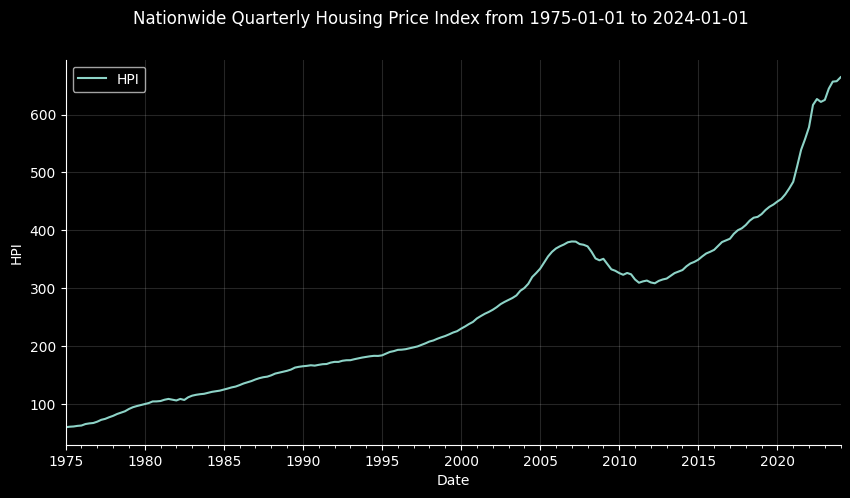

In [9]:
min_date = min(hpi_nation.index)
max_date = max(hpi_nation.index)
fig, ax = plt.subplots(figsize=(10,5))
hpi_nation.plot()
ax.set_ylabel("HPI")
ax.legend()
ax.grid(alpha=0.15)
fig.suptitle("Nationwide Quarterly Housing Price Index from {} to {}".format(min_date.strftime("%Y-%m-%d"), max_date.strftime("%Y-%m-%d")))
plt.show()

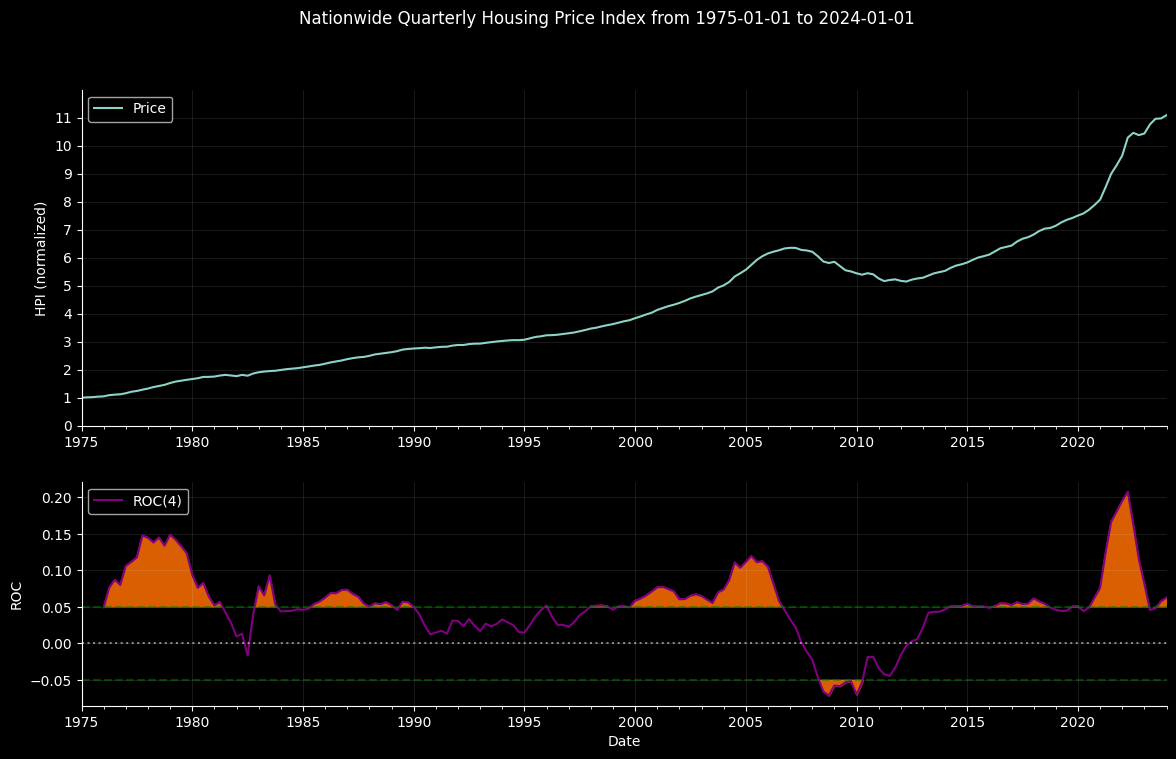

In [21]:
fig2, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,2]}, figsize=(14,8))
normed_hpi_nation.plot(label="Price", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("HPI (normalized)")
ax1.legend()
ax1.grid(alpha=0.1)
ax1.set_ylim(0, int(max(normed_hpi_nation + 1)))
ax1.set_yticks(np.arange(0, int(max(normed_hpi_nation + 1)), step=1))

roc.plot(ax=ax2, label="ROC({})".format(n_period), color="purple")
ax2.fill_between(roc.index, roc, 0.05, where=(roc > 0.05), color=dark2[1], interpolate=True)
ax2.fill_between(roc.index, roc, -0.05, where=(roc < -0.05), color=dark2[1], interpolate=True)
ax2.set_xlabel("Date")
ax2.set_ylabel("ROC")
ax2.grid(alpha=0.1)
ax2.legend()
ax2.axhline(y=0, ls=':', color='white', alpha=0.5)
ax2.axhline(y=0.05, ls='--', color='green', alpha=0.5)
ax2.axhline(y=-0.05, ls='--', color='green', alpha=0.5)

fig2.suptitle("Nationwide Quarterly Housing Price Index from {} to {}".format(min_date.strftime("%Y-%m-%d"), max_date.strftime("%Y-%m-%d")))
plt.show()